# Homework 2: Problems
## Due Friday 26 October

### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1  (50 points)
On Data Camp:

Statistical Thinking in Python (Part 2): Bootstrap confidence intervals 

This is Chapter 2.  You shouldn't need Chapter 1, but you are welcome to do it.  If this chapter interests you, then you might get something out of completing Chapters 3 and 4 as well.

## Problem 2 (25 points)
Repeat the simple MLE example from class (Inference2.ipynb), but with 2 changes.  First allow for a variable number of data points (and show for `N=3` and `N=10`.  Second, limit the range of valid solutions for $\mu$ to $\mu>1.1$ (just for `N=10`).  How does that affect your results?  Use a random seed of 42 for all.


## Problem 3 (25 points)

Produce the "trace" plot for the clear/cloudy day problem from Inference2.ipynb.  Then plot the histogram of that trace, throwing away steps in the trace that could be considered part of the burn-in.  Your plots should look like the ones from class (or nicer!).  Confirm that you get the same answer for day $N$ as day $N+1$ and it doesn't matter whether is was clear or cloudy on the day that you started. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
np.random.seed(42)

## Problem 2

### N = 3 (Original)

In [2]:
mu = 1.0
sigma = 0.2

N = 3
sample = norm(loc=mu,scale=sigma).rvs(N)
print(sample)

[1.09934283 0.97234714 1.12953771]


Likelihood is maximized at 1.067


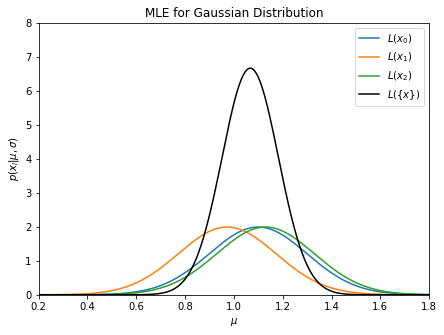

In [3]:
# generate list of gaussian PDFs whose means are the element of sample and total PDF
muGrid = np.linspace(0,2,1000)
L, L_arr = [], []
for i in range(N):
    L_arr.append( norm.pdf(muGrid, loc=sample[i], scale=sigma) )
    if (i==0):
        L = L_arr[0]
    else:
        L = L * L_arr[i]

# plot distributions
fig, ax = plt.subplots(figsize=(7, 5))
for i in range(N):
    plt.plot(muGrid, L_arr[i], ls='-', label=r"$L(x_{0})$".format(i))
plt.plot(muGrid, L, ls='-', c='black', label=r"$L(\{x\})$")

plt.xlim(0.2, 1.8)
plt.ylim(0, 8.0)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.title('MLE for Gaussian Distribution')
plt.legend()

# find maximum likelihood
idx = np.argsort(L)
print("Likelihood is maximized at %.3f" % muGrid[idx[-1]])

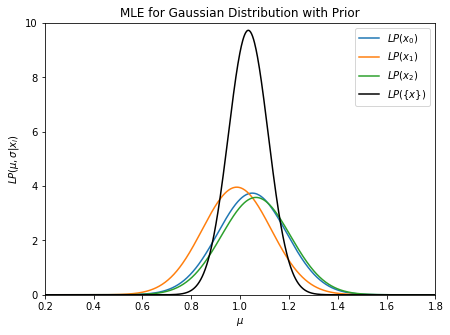

Posterior PDF is maximized at 1.033


In [4]:
Prior = norm.pdf(muGrid,loc=mu,scale=sigma) #Prior PDF

# generate list of posterior PDFs and total PDF
LP, LP_arr = [], []
for i in range(N):
    LP_arr.append( L_arr[i] * Prior )
    if (i==0):
        LP = LP_arr[0]
    else:
        LP = LP * LP_arr[i]

# plot distributions
fig, ax = plt.subplots(figsize=(7, 5))
for i in range(N):
    plt.plot(muGrid, LP_arr[i], ls='-', label=r"$LP(x_{0})$".format(i))
plt.plot(muGrid, LP/5, ls='-', c='black', label=r"$LP(\{x\})$") # plot is scaled for display purposes

plt.xlim(0.2, 1.8)
plt.ylim(0, 10.0)
plt.xlabel('$\mu$')
plt.ylabel(r'$LP(\mu,\sigma|x_i)$')
plt.title('MLE for Gaussian Distribution with Prior')
plt.legend()
plt.show()

idx = np.argsort(LP)
print("Posterior PDF is maximized at %.3f" % muGrid[idx[-1]])

### N = 10 (Original)

In [5]:
mu = 1.0
sigma = 0.2

N = 10
sample = norm(loc=mu,scale=sigma).rvs(N)
print(sample)

[1.30460597 0.95316933 0.95317261 1.31584256 1.15348695 0.90610512
 1.10851201 0.90731646 0.90685405 1.04839245]


Likelihood is maximized at 1.055


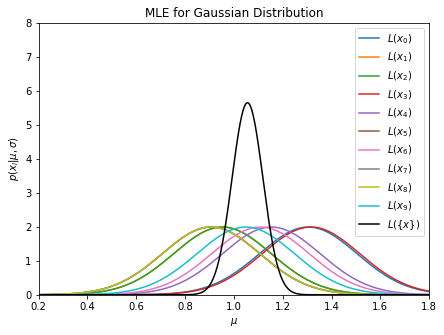

In [6]:
# generate list of gaussian PDFs whose means are the element of sample and total PDF
muGrid = np.linspace(0,2,1000)
L, L_arr = [], []
for i in range(N):
    L_arr.append( norm.pdf(muGrid, loc=sample[i], scale=sigma) )
    if (i==0):
        L = L_arr[0]
    else:
        L = L * L_arr[i]

# plot distributions
fig, ax = plt.subplots(figsize=(7, 5))
for i in range(N):
    plt.plot(muGrid, L_arr[i], ls='-', label=r"$L(x_{0})$".format(i))
plt.plot(muGrid, L/10, ls='-', c='black', label=r"$L(\{x\})$") # plot is scaled for display purposes

plt.xlim(0.2, 1.8)
plt.ylim(0, 8.0)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.title('MLE for Gaussian Distribution')
plt.legend()

# find maximum likelihood
idx = np.argsort(L)
print("Likelihood is maximized at %.3f" % muGrid[idx[-1]])

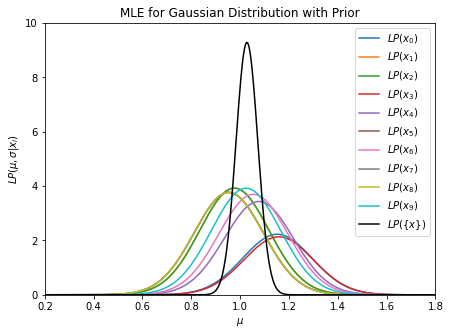

Posterior PDF is maximized at 1.027


In [7]:
Prior = norm.pdf(muGrid,loc=mu,scale=sigma) #Prior PDF

# generate list of posterior PDFs and total PDF
LP, LP_arr = [], []
for i in range(N):
    LP_arr.append( L_arr[i] * Prior )
    if (i==0):
        LP = LP_arr[0]
    else:
        LP = LP * LP_arr[i]

# plot distributions
fig, ax = plt.subplots(figsize=(7, 5))
for i in range(N):
    plt.plot(muGrid, LP_arr[i], ls='-', label=r"$LP(x_{0})$".format(i))
plt.plot(muGrid, LP/5000, ls='-', c='black', label=r"$LP(\{x\})$") # plot is scaled for display purposes

plt.xlim(0.2, 1.8)
plt.ylim(0, 10.0)
plt.xlabel('$\mu$')
plt.ylabel(r'$LP(\mu,\sigma|x_i)$')
plt.title('MLE for Gaussian Distribution with Prior')
plt.legend()
plt.show()

idx = np.argsort(LP)
print("Posterior PDF is maximized at %.3f" % muGrid[idx[-1]])

### N = 10 ($\mu$ > 1.1 for each distribution)

In [8]:
mu = 1.0
sigma = 0.2

N = 10
sample = []
while (len(sample) < N):
    draw = norm(loc=mu,scale=sigma).rvs(1)[0]
    if (draw > 1.1):
        sample.append(draw)
sample = np.array(sample)
print(sample)

[1.29312975 1.37045564 1.16450898 1.14769332 1.21142445 1.12233526
 1.2061999  1.18625602 1.19510903 1.16250516]


Likelihood is maximized at 1.205


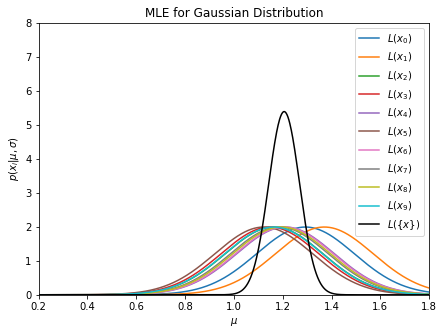

In [9]:
# generate list of gaussian PDFs whose means are the element of sample and total PDF
muGrid = np.linspace(0,2,1000)
L, L_arr = [], []
for i in range(N):
    L_arr.append( norm.pdf(muGrid, loc=sample[i], scale=sigma) )
    if (i==0):
        L = L_arr[0]
    else:
        L = L * L_arr[i]

# plot distributions
fig, ax = plt.subplots(figsize=(7, 5))
for i in range(N):
    plt.plot(muGrid, L_arr[i], ls='-', label=r"$L(x_{0})$".format(i))
plt.plot(muGrid, L/100, ls='-', c='black', label=r"$L(\{x\})$") # plot is scaled for display purposes

plt.xlim(0.2, 1.8)
plt.ylim(0, 8.0)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.title('MLE for Gaussian Distribution')
plt.legend()

# find maximum likelihood
idx = np.argsort(L)
print("Likelihood is maximized at %.3f" % muGrid[idx[-1]])

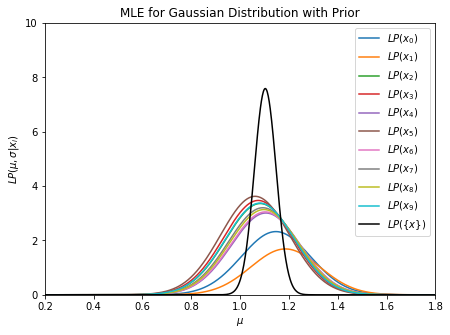

Posterior PDF is maximized at 1.103


In [10]:
Prior = norm.pdf(muGrid,loc=mu,scale=sigma) #Prior PDF

# generate list of posterior PDFs and total PDF
LP, LP_arr = [], []
for i in range(N):
    LP_arr.append( L_arr[i] * Prior )
    if (i==0):
        LP = LP_arr[0]
    else:
        LP = LP * LP_arr[i]

# plot distributions
fig, ax = plt.subplots(figsize=(7, 5))
for i in range(N):
    plt.plot(muGrid, LP_arr[i], ls='-', label=r"$LP(x_{0})$".format(i))
plt.plot(muGrid, LP/5000, ls='-', c='black', label=r"$LP(\{x\})$") # plot is scaled for display purposes

plt.xlim(0.2, 1.8)
plt.ylim(0, 10.0)
plt.xlabel('$\mu$')
plt.ylabel(r'$LP(\mu,\sigma|x_i)$')
plt.title('MLE for Gaussian Distribution with Prior')
plt.legend()
plt.show()

idx = np.argsort(LP)
print("Posterior PDF is maximized at %.3f" % muGrid[idx[-1]])

## Problem 3

In [11]:
# markov chain probabilities
p_clear2clear = 0.9
p_clear2cloudy = 0.1
p_cloudy2clear = 0.5
p_cloudy2cloudy = 0.5
N = 10000

Clear First Day P(clear) = 0.8407
Clear First Day P(cloudy) = 0.1593
Cloudy First Day P(clear) = 0.8282
Cloudy First Day P(cloudy) = 0.1718


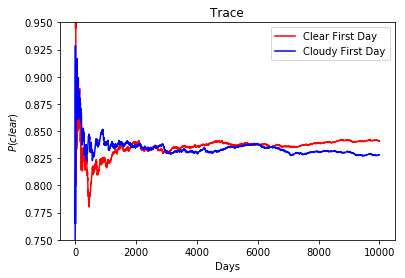

In [12]:
# start with clear day

# instantiate markov chain results for N days
# True is clear day. False is cloudy day
clear_first_day = True
days_clearfirst = np.empty((N), dtype=bool)

# generate markov chain results
for i in range(N):
    if (i==0):
        days_clearfirst[0] = clear_first_day
        continue
    # generate single random number from 0 to 1
    p = np.random.random()
    # case where previous day is clear
    if (days_clearfirst[i-1]):
        days_clearfirst[i] = p < p_clear2clear
    # case where previous day is cloudy
    else:
        days_clearfirst[i] = p < p_cloudy2clear

# generate probability of clear day array
p_days_clearfirst = np.empty((N))
clear_tot = 0
for i in range(N):
    if (days_clearfirst[i]):
        clear_tot += 1
    p_days_clearfirst[i] = float(clear_tot) / (i+1)

# repeat previous code except start with cloudy day

# instantiate markov chain results for N days
# True is clear day. False is cloudy day
clear_first_day = False
days_cloudyfirst = np.empty((N), dtype=bool)

# generate markov chain results
for i in range(N):
    if (i==0):
        days_cloudyfirst[0] = clear_first_day
        continue
    # generate single random number from 0 to 1
    p = np.random.random()
    # case where previous day is clear
    if (days_cloudyfirst[i-1]):
        days_cloudyfirst[i] = p < p_clear2clear
    # case where previous day is cloudy
    else:
        days_cloudyfirst[i] = p < p_cloudy2clear

# generate probability of clear day array
p_days_cloudyfirst = np.empty((N))
clear_tot = 0
for i in range(N):
    if (days_cloudyfirst[i]):
        clear_tot += 1
    p_days_cloudyfirst[i] = float(clear_tot) / (i+1)

# plot trace
x = np.linspace(0, N, N, endpoint=False)
plt.plot(x, p_days_clearfirst, ls='-', c="red", label="Clear First Day")
plt.plot(x, p_days_cloudyfirst, ls='-', c="blue", label="Cloudy First Day")
plt.xlim(0-(N*0.05), N+(N*0.05))
plt.ylim(0.75, 0.95)
plt.xlabel("Days")
plt.ylabel("$P(clear)$")
plt.title("Trace")
plt.legend()

print("Clear First Day P(clear) = {:.4f}".format(p_days_clearfirst[-1]))
print("Clear First Day P(cloudy) = {:.4f}".format(1.0 - p_days_clearfirst[-1]))
print("Cloudy First Day P(clear) = {:.4f}".format(p_days_cloudyfirst[-1]))
print("Cloudy First Day P(cloudy) = {:.4f}".format(1.0 - p_days_cloudyfirst[-1]))

Results are similar for markov chains starting with clear day or cloudy day. After many days, the values of both have stabilized to around 0.83

In [13]:
from astroML.plotting import hist as fancyhist

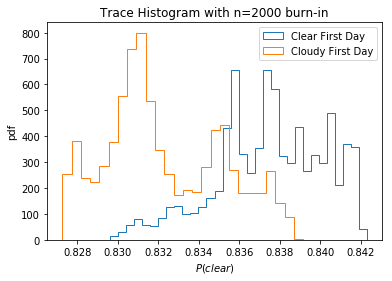

In [14]:
# add a burn-in data set
burn_num = 2000
p_days_clearfirst_burn = p_days_clearfirst[burn_num:]
p_days_cloudyfirst_burn = p_days_cloudyfirst[burn_num:]

# plot histograms of trace
fancyhist(p_days_clearfirst_burn, bins="freedman", histtype="step", label="Clear First Day")
fancyhist(p_days_cloudyfirst_burn, bins="freedman", histtype="step", label="Cloudy First Day")

plt.xlabel("$P(clear)$")
plt.ylabel("pdf")
plt.title("Trace Histogram with n={0} burn-in".format(burn_num))
plt.legend()